**Theory Questions & Answers**

1. What is Logistic Regression, and how does it differ from Linear Regression?
   - Logistic Regression is a classification algorithm used to predict categorical outcomes (binary or multiclass).
     It models the probability of an event occurring using the sigmoid function.
   - Linear Regression predicts continuous numerical values and assumes a linear relationship between input features and the target variable.

2. What is the mathematical equation of Logistic Regression?
   - P(y=1 | X) = 1 / (1 + e^(-z)), where z = w1*x1 + w2*x2 + ... + b

3. Why do we use the Sigmoid function in Logistic Regression?
   - The sigmoid function maps any real-valued number into the range [0, 1], which allows us to interpret the output as a probability.

4. What is the cost function of Logistic Regression?
   - The cost function is the log loss (or binary cross-entropy):
     J(w) = -1/m * Σ [y*log(ŷ) + (1-y)*log(1-ŷ)]

5. What is Regularization in Logistic Regression? Why is it needed?
   - Regularization adds a penalty term to the cost function to prevent overfitting. It helps reduce model complexity by shrinking coefficients.

6. Explain the difference between Lasso, Ridge, and Elastic Net regression.
   - Lasso (L1): Adds absolute value of coefficients as penalty. Can shrink some coefficients to zero (feature selection).
   - Ridge (L2): Adds squared magnitude of coefficients as penalty. Shrinks coefficients but doesn't make them zero.
   - Elastic Net: Combines both L1 and L2 penalties.

7. When should we use Elastic Net instead of Lasso or Ridge?
   - Use Elastic Net when there are multiple correlated features, as it combines the benefits of both L1 and L2 regularization.

8. What is the impact of the regularization parameter (λ) in Logistic Regression?
   - Higher λ increases regularization strength, shrinking coefficients more aggressively. Lower λ reduces regularization, allowing the model to fit the data more closely.

9. What are the key assumptions of Logistic Regression?
   - Binary or multiclass target variable.
   - No multicollinearity among features.
   - Linear relationship between log-odds and independent variables.

10. What are some alternatives to Logistic Regression for classification tasks?
    - Alternatives include Decision Trees, Random Forests, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Neural Networks.

11. What are Classification Evaluation Metrics?
    - Metrics include Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix.

12. How does class imbalance affect Logistic Regression?
    - Class imbalance can lead to biased predictions favoring the majority class. Techniques like class weighting or resampling can help.

13. What is Hyperparameter Tuning in Logistic Regression?
    - Hyperparameter tuning involves optimizing parameters like C (regularization strength) and penalty type (L1/L2) to improve model performance.

14. What are different solvers in Logistic Regression? Which one should be used?
    - Solvers include 'liblinear', 'lbfgs', 'saga', etc. 'liblinear' is good for small datasets, while 'saga' supports elastic net.

15. How is Logistic Regression extended for multiclass classification?
    - Using One-vs-Rest (OvR) or Softmax (multinomial) approaches.

16. What are the advantages and disadvantages of Logistic Regression?
    - Advantages: Simple, interpretable, works well with linearly separable data.
    - Disadvantages: Assumes linearity, struggles with complex relationships.

17. What are some use cases of Logistic Regression?
    - Spam detection, credit scoring, medical diagnosis, etc.

18. What is the difference between Softmax Regression and Logistic Regression?
    - Logistic Regression is for binary classification, while Softmax extends it to multiclass classification.

19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
    - OvR trains separate classifiers for each class, while Softmax trains a single classifier. Choose based on dataset size and complexity.

20. How do we interpret coefficients in Logistic Regression?
    - Coefficients indicate the change in log-odds of the outcome for a unit change in the feature.

**Practical Questions & Answers**

In [87]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer, load_iris
import matplotlib.pyplot as plt
import joblib

In [55]:
# 1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Logistic Regression Accuracy: 0.96


In [56]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print(f"L1 Regularization (Lasso) Accuracy: {accuracy_score(y_test, y_pred_lasso):.2f}")

L1 Regularization (Lasso) Accuracy: 0.96


In [57]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2'). Print model accuracy and coefficients
ridge_model = LogisticRegression(penalty='l2', max_iter=10000)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print(f"L2 Regularization (Ridge) Accuracy: {accuracy_score(y_test, y_pred_ridge):.2f}")
print("Coefficients:", ridge_model.coef_)

L2 Regularization (Ridge) Accuracy: 0.96
Coefficients: [[ 0.98060078  0.22681812 -0.36807616  0.02627772 -0.1521029  -0.23288815
  -0.51821369 -0.27135831 -0.22223997 -0.0370472  -0.09364186  1.40092214
  -0.16140779 -0.08952574 -0.021555    0.04162094 -0.04789659 -0.03125384
  -0.03432778  0.01071906  0.09718192 -0.51589261 -0.01691194 -0.01652987
  -0.30021135 -0.77298739 -1.41292275 -0.49327465 -0.72966298 -0.10215442]]


In [59]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
elastic_net_model.fit(X_train, y_train)
y_pred_elastic = elastic_net_model.predict(X_test)
print(f"Elastic Net Regularization Accuracy: {accuracy_score(y_test, y_pred_elastic):.2f}")

Elastic Net Regularization Accuracy: 0.97


In [88]:
# 5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ovr_model = OneVsRestClassifier(LogisticRegression(max_iter=10000))
ovr_model.fit(X_train, y_train)
y_pred_ovr = ovr_model.predict(X_test)
print(f"Multiclass OvR Accuracy: {accuracy_score(y_test, y_pred_ovr):.2f}")

Multiclass OvR Accuracy: 0.96


In [61]:
# 6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=10000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"GridSearchCV Best Accuracy: {grid_search.best_score_:.2f}")

Best Parameters: {'C': 10, 'penalty': 'l2'}
GridSearchCV Best Accuracy: 0.96


In [62]:
# 7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []
for train_idx, test_idx in skf.split(X, y):
    X_train_cv, X_test_cv = X[train_idx], X[test_idx]
    y_train_cv, y_test_cv = y[train_idx], y[test_idx]
    model_cv = LogisticRegression(max_iter=10000)
    model_cv.fit(X_train_cv, y_train_cv)
    scores.append(accuracy_score(y_test_cv, model_cv.predict(X_test_cv)))
print(f"Stratified K-Fold Average Accuracy: {np.mean(scores):.2f}")

Stratified K-Fold Average Accuracy: 0.95


In [63]:
# 8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
# Example: Load Iris dataset
iris_data = load_iris()
X_iris, y_iris = iris_data.data, iris_data.target
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

model_iris = LogisticRegression(max_iter=10000)
model_iris.fit(X_train_iris, y_train_iris)
y_pred_iris = model_iris.predict(X_test_iris)
print(f"Iris Dataset Accuracy: {accuracy_score(y_test_iris, y_pred_iris):.2f}")

Iris Dataset Accuracy: 1.00


In [64]:
# 9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy
param_dist = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
random_search = RandomizedSearchCV(LogisticRegression(max_iter=10000), param_distributions=param_dist, n_iter=5, cv=5)
random_search.fit(X_train, y_train)
print(f"RandomizedSearchCV Best Parameters: {random_search.best_params_}")
print(f"RandomizedSearchCV Best Accuracy: {random_search.best_score_:.2f}")

RandomizedSearchCV Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
RandomizedSearchCV Best Accuracy: 0.96


In [84]:
# 10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=10000))
ovo_model.fit(X_train, y_train)
y_pred_ovo = ovo_model.predict(X_test)
print(f"One-vs-One Multiclass Accuracy: {accuracy_score(y_test, y_pred_ovo):.2f}")

One-vs-One Multiclass Accuracy: 0.96


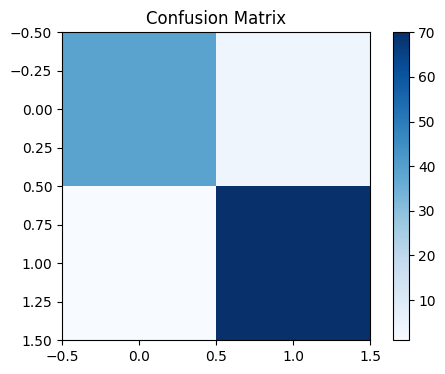

In [66]:
# 11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.show()

In [67]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [68]:
# 13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance
imbalanced_model = LogisticRegression(class_weight='balanced', max_iter=10000)
imbalanced_model.fit(X_train, y_train)
y_pred_imbalanced = imbalanced_model.predict(X_test)
print(f"Imbalanced Data Accuracy: {accuracy_score(y_test, y_pred_imbalanced):.2f}")

Imbalanced Data Accuracy: 0.97


In [70]:
# 14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance
# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_titanic = pd.read_csv(url)

# Handle missing values
df_titanic.dropna(subset=['Age', 'Fare', 'Embarked'], inplace=True)
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})
df_titanic['Embarked'] = df_titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X_titanic = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_titanic = df_titanic['Survived']

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

titanic_model = LogisticRegression(max_iter=10000)
titanic_model.fit(X_train_titanic, y_train_titanic)
y_pred_titanic = titanic_model.predict(X_test_titanic)
print(f"Titanic Dataset Accuracy: {accuracy_score(y_test_titanic, y_pred_titanic):.2f}")

Titanic Dataset Accuracy: 0.80


In [72]:
# 15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model_scaled = LogisticRegression(max_iter=10000)
model_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = model_scaled.predict(X_test_scaled)
print(f"Scaled Data Accuracy: {accuracy_score(y_test_scaled, y_pred_scaled):.2f}")
print(f"Raw Data Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Scaled Data Accuracy: 0.97
Raw Data Accuracy: 0.96


In [73]:
# 16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 1.00


In [74]:
# 17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy
custom_lr_model = LogisticRegression(C=0.5, max_iter=10000)
custom_lr_model.fit(X_train, y_train)
y_pred_custom_lr = custom_lr_model.predict(X_test)
print(f"Custom Learning Rate Accuracy: {accuracy_score(y_test, y_pred_custom_lr):.2f}")

Custom Learning Rate Accuracy: 0.96


In [75]:
# 18. Write a Python program to train Logistic Regression and identify important features based on model coefficients
print("Important Features (Coefficients):", model.coef_)

Important Features (Coefficients): [[ 0.98060078  0.22681812 -0.36807616  0.02627772 -0.1521029  -0.23288815
  -0.51821369 -0.27135831 -0.22223997 -0.0370472  -0.09364186  1.40092214
  -0.16140779 -0.08952574 -0.021555    0.04162094 -0.04789659 -0.03125384
  -0.03432778  0.01071906  0.09718192 -0.51589261 -0.01691194 -0.01652987
  -0.30021135 -0.77298739 -1.41292275 -0.49327465 -0.72966298 -0.10215442]]


In [76]:
# 19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.2f}")

Cohen's Kappa Score: 0.91


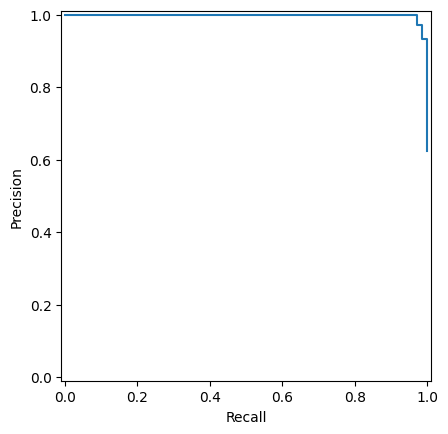

In [77]:
# 20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

In [78]:
# 21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    solver_model = LogisticRegression(solver=solver, max_iter=10000)
    solver_model.fit(X_train, y_train)
    y_pred_solver = solver_model.predict(X_test)
    print(f"Solver: {solver}, Accuracy: {accuracy_score(y_test, y_pred_solver):.2f}")

Solver: liblinear, Accuracy: 0.96
Solver: saga, Accuracy: 0.97
Solver: lbfgs, Accuracy: 0.96


In [79]:
# 22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.2f}")

Matthews Correlation Coefficient: 0.91


In [80]:
# 23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling
raw_model = LogisticRegression(max_iter=10000)
raw_model.fit(X_train, y_train)
y_pred_raw = raw_model.predict(X_test)
print(f"Raw Data Accuracy: {accuracy_score(y_test, y_pred_raw):.2f}")
print(f"Scaled Data Accuracy: {accuracy_score(y_test_scaled, y_pred_scaled):.2f}")

Raw Data Accuracy: 0.96
Scaled Data Accuracy: 0.97


In [100]:
# 24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_c = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_c = GridSearchCV(LogisticRegression(max_iter=10000), param_grid_c, cv=5)
grid_search_c.fit(X_train, y_train)
print(f"Optimal C: {grid_search_c.best_params_['C']}")
print(f"Optimal C Accuracy: {grid_search_c.best_score_:.2f}")

Optimal C: 100
Optimal C Accuracy: 0.97


In [99]:
# 25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions
joblib.dump(model, 'logistic_regression_model.joblib')
loaded_model = joblib.load('logistic_regression_model.joblib')
print(f"Loaded Model Accuracy: {accuracy_score(y_test, loaded_model.predict(X_test)):.2f}")

Loaded Model Accuracy: 0.96
